In [9]:
seq = [('b', (12,13)), ('c', (1,3)), ('d', (132,133))]
list(zip(*seq))[1]

((12, 13), (1, 3), (132, 133))

In [ ]:
import requests
import Config
pair = ["BTC", "USDT"]

tuple_separate = True
endpoint = "/api/v1/market/orderbook/level1"
r = requests.get(f"https://api.kucoin.com{endpoint}?symbol={pair[0]}-{pair[1]}").json()
print(r)
if r['data']:
    bid = r['data']['bestBid']
    ask = r['data']['bestAsk']
    last = r['data']['price']
    return (float(bid), float(ask), float(last))
else:
    print(r)    


In [ ]:
msg1 = '[1588,{"a":["38.873400",53,"53.39956000"],"b":["38.850800",54,"54.75000000"],"c":["38.873400","1.35044000"],"v":["17294.95872527","373656.15770012"],"p":["38.510320","37.239790"],"t":[990,13694],"l":["37.[548,{"a":["4572.36000",103,"103.09386923"],"b":["4572.35000",2,"2.25901810"],"c":["4572.36000","0.00428791"],"v":["1633.99178274","30950.68514225"],"p":["4575.25650","4571.83520"],"t":[1591,28624],"l":["4556.98000","4455.14000"],"h":["4608.78000","4668.00000"],"o":["4607.00000","4626.00000"]},"ticker","ETH/USD"]'
msg2 = "{'channelID': 2516, 'channelName': 'ticker', 'event': 'subscriptionStatus', 'pair': 'ALGO/ETH', 'status': 'subscribed', 'subscription': {'name': 'ticker'}}"

In [11]:
import pickle
def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
from TradeExecutionModel import TradeExecutionModel
from GeneticArbitrageModel import GeneticArbitrageModel
from API import KrakenAPI
from DataManagement import ExchangeData

Pairs = load_obj("KrakenPairs")
KrakenAPI = KrakenAPI()
KrakenData = ExchangeData(KrakenAPI)
KrakenData.Pairs = Pairs
GA = GeneticArbitrageModel(KrakenData) 
GA.do_evolution(4,500) 

In [ ]:
# Plot population size vs profits
# Plot population size vs execution time
import time

vector_length = 4
pop_size1 = 100
pop_size2 = 4000
pop_size = pop_size1
pop_sizes = []
pop_sizes1 = []
out_profits = []
times = []
while pop_size < pop_size2:
    t1 = time.time()
    profits = GA.do_evolution(vector_length, pop_size)
    elasped = time.time() - t1
    times.append(elasped)
    pop_sizes1.append(pop_size)
    
    for profit in profits:
        out_profits.append(profit)
        pop_sizes.append(pop_size)
        
    print(f"New pop size {pop_size}")
    pop_size += 100



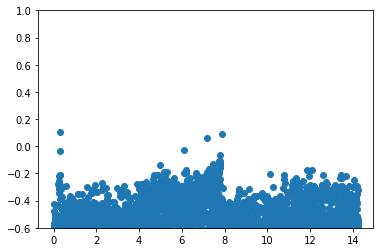

In [117]:
import matplotlib.pyplot as plt
from util import *

data = load_obj("ProfitComparison")
data['time'] = [t/60 for t in data["time"]]
data['time'] =[time*60 for time in data['time']]
plt.ylim((-.6,1))
#plt.scatter(data["time2"], data["API"])
plt.scatter(data["time"], data["GA"])

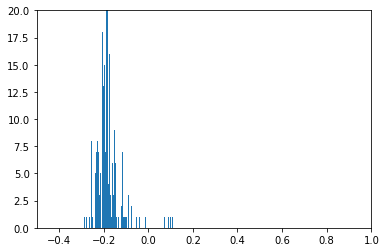

In [116]:

plt.xlim((-.5,1))
plt.ylim((0,20))

a= plt.hist(data['GA'], bins = 100)

In [118]:
winners = load_obj("winning_alts")
len(winners)

140

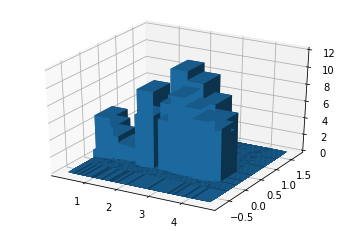

In [103]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import interactive
interactive(True)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(data['time'], data['GA'], bins=50, range=[[0, 4], [-1, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')


plt.show()

In [102]:
%matplotlib inline